# Explore here

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from pickle import dump

**Loading the data**

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Data Inspection**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**EDA**

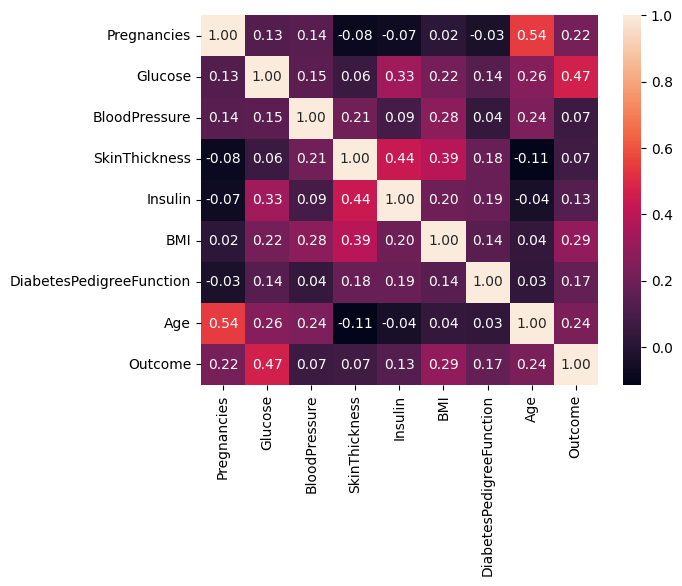

In [12]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

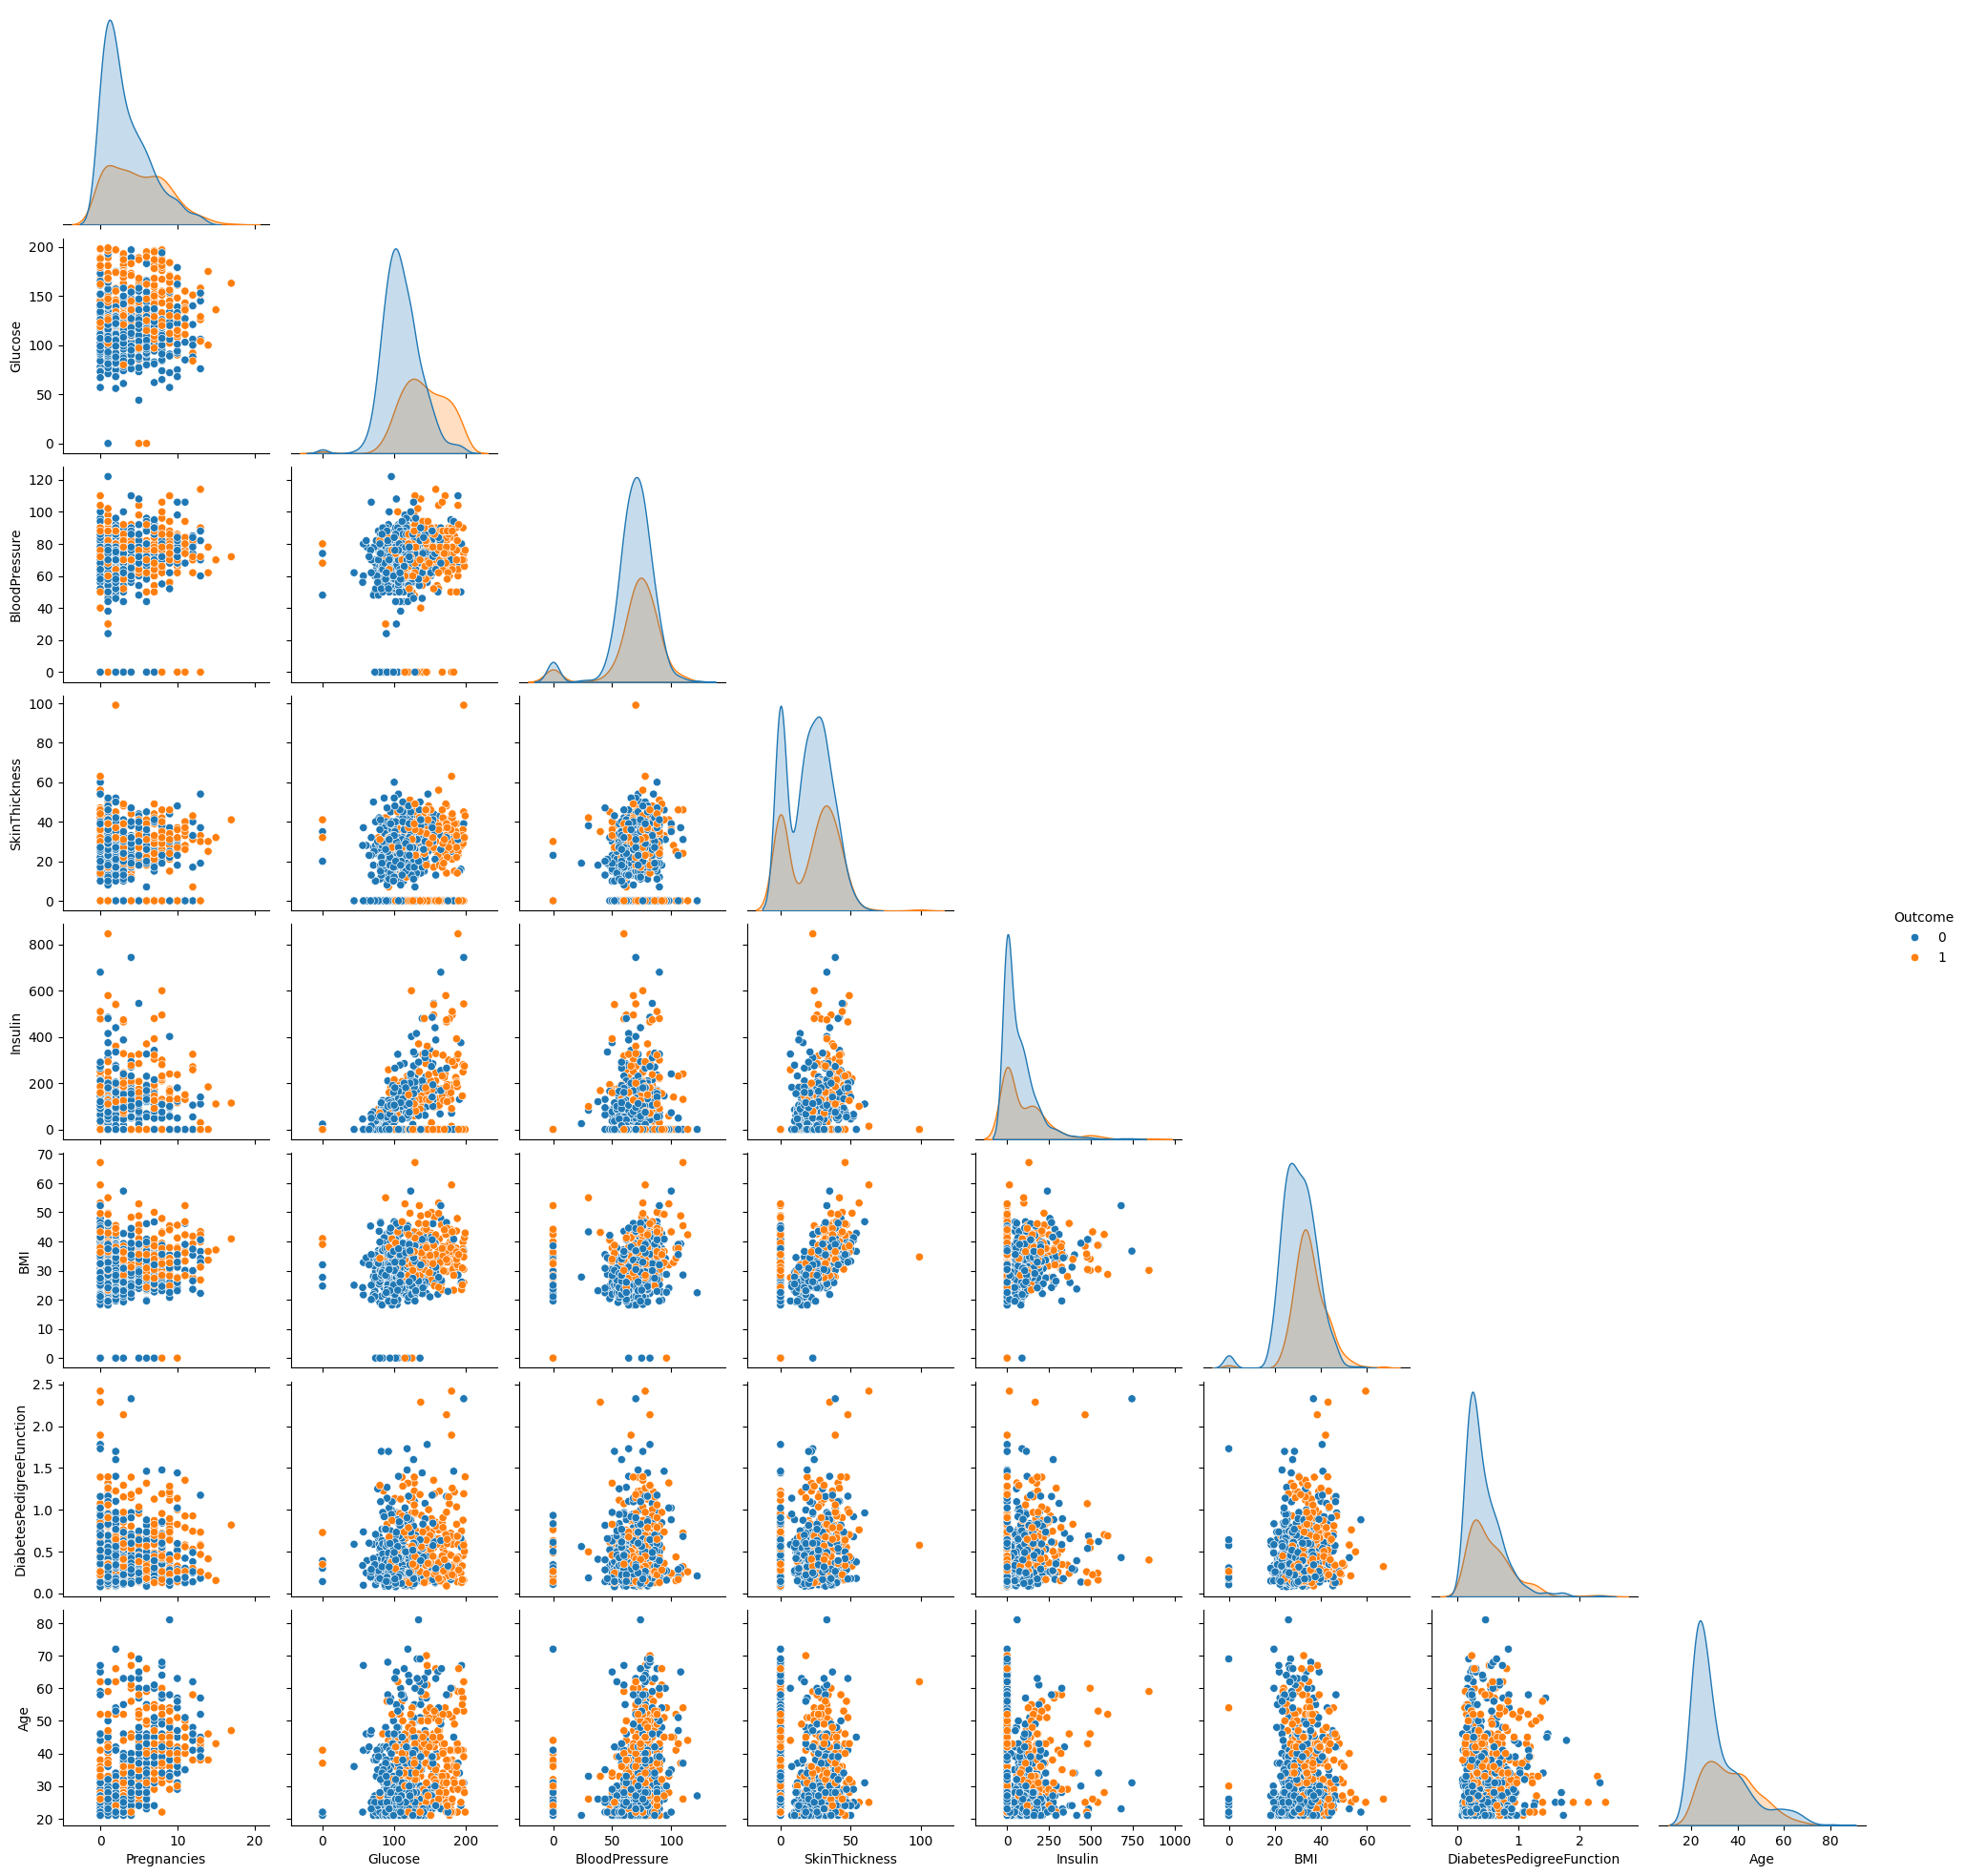

In [13]:
sns.pairplot(df, hue='Outcome', corner=True)
plt.show()

**Dataset split**

In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [10]:
print('Train data:\nX:', X_train.shape, 'y:', y_train.shape)
print('Test data:\nX:', X_test.shape, 'y:', y_test.shape)

Train data:
X: (614, 8) y: (614,)
Test data:
X: (154, 8) y: (154,)


**Training the Model - RandomForestClassifier**

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

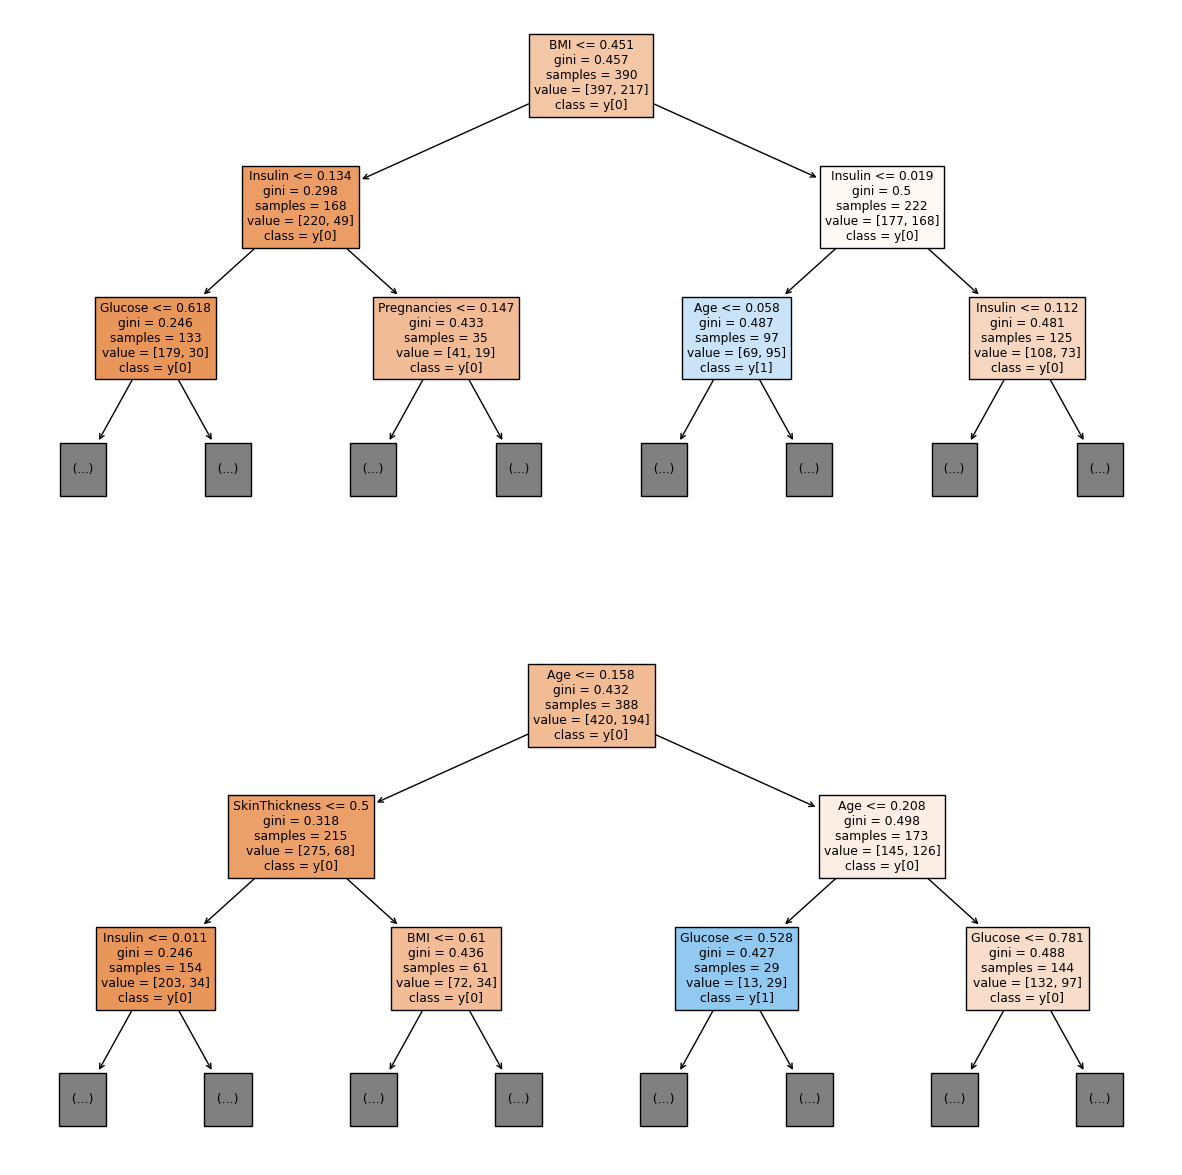

In [18]:
fig, axis = plt.subplots(2, figsize=(15,15))
tree.plot_tree(model.estimators_[0], ax = axis[0], feature_names = X_train.columns, class_names = True, filled = True, max_depth=2)
tree.plot_tree(model.estimators_[1], ax = axis[1], feature_names = X_train.columns, class_names = True, filled = True, max_depth=2)
plt.show()

In [12]:
#Model Prediction - train data
ytrain = model.predict(X_train)

#Model Prediction - test data
y_pred = model.predict(X_test)

In [13]:
#Evaluation of the model
accuracy_train = accuracy_score(y_train, ytrain)
f1_train = f1_score(y_train, ytrain)
print(f'Accuracy on train data is {accuracy_train:.2f}')
print(f'F1 Score on train data is {f1_train:.2f}')
accuracy_predict = accuracy_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
print(f'Accuracy on test data is {accuracy_predict:.2f}')
print(f'F1 Score on test data is {f1_test:.2f}')

Accuracy on train data is 1.00
F1 Score on train data is 1.00
Accuracy on test data is 0.72
F1 Score on test data is 0.61


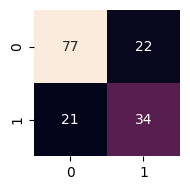

In [14]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(2,2))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()

**Optimizing the model**

In [26]:
hyperparams = {
    'bootstrap': [True, False],
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_depth": [None, 5, 10, 15, 20, 40],
    "min_samples_split": [2, 5],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'n_estimators': [10,50,100,200]
}

model_rand = RandomizedSearchCV(model, hyperparams, scoring = "f1", cv = 5)
model_rand

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 5, 10, 15, 20, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1')

In [27]:
model_rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 5, 10, 15, 20, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1')

In [28]:
random_best = model_rand.best_estimator_

In [29]:
#Train model with new parameters
random_best.fit(X_train, y_train)
y_pred_best = random_best.predict(X_test)

In [30]:
ytrain_best = random_best.predict(X_train)

In [31]:
print(f'Test - After model optimization:\nAccuracy score = {accuracy_score(y_test, y_pred_best):.2f}\nF1 score = {f1_score(y_test, y_pred_best):.2f}.')
print(f'Train - After model optimization:\nAccuracy score = {accuracy_score(y_train, ytrain_best):.2f}\nF1 score = {f1_score(y_train, ytrain_best):.2f}.')


Test - After model optimization:
Accuracy score = 0.75
F1 score = 0.65.
Train - After model optimization:
Accuracy score = 1.00
F1 score = 1.00.


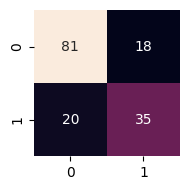

In [32]:
cm_best = confusion_matrix(y_test, y_pred_best)

cm_df = pd.DataFrame(cm_best)

plt.figure(figsize=(2,2))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()

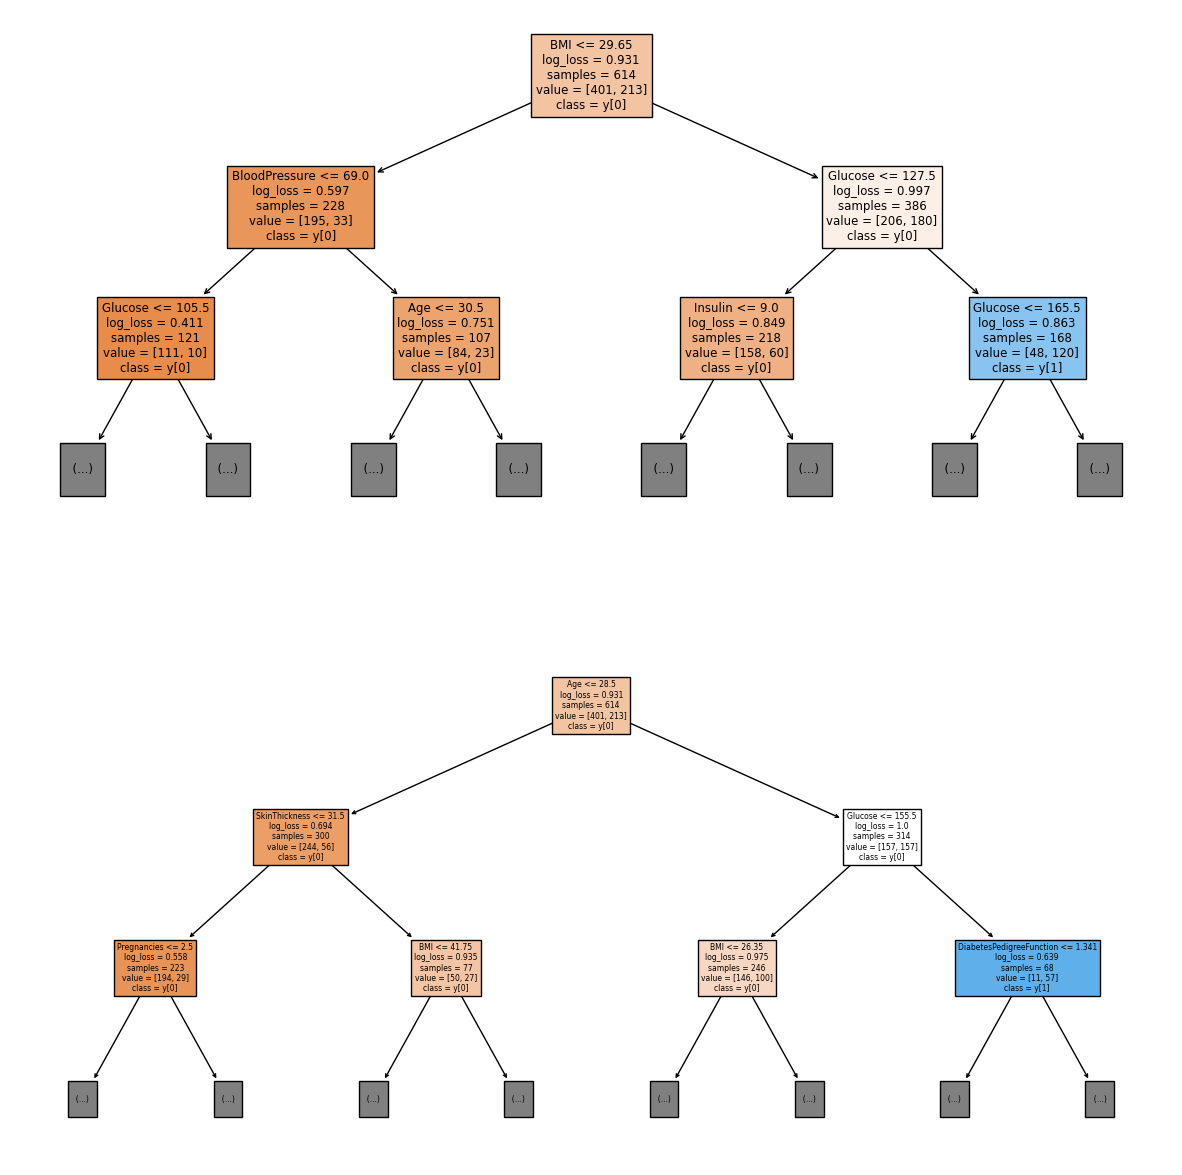

In [33]:
fig, axis = plt.subplots(2, figsize=(15,15))
tree.plot_tree(random_best.estimators_[0], ax = axis[0], feature_names = X_train.columns, class_names = True, filled = True, max_depth=2)
tree.plot_tree(random_best.estimators_[1], ax = axis[1], feature_names = X_train.columns, class_names = True, filled = True, max_depth=2)
plt.show()

**Saving the model**

In [ ]:
dump(random_best, open("../models/random_forest_classifier.sav", "wb"))